In [ ]:
appointment 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import datetime
import calendar

### variable

- PatientId - 환자를 식별할수 식별자
- AppointmentID - 예약의 식별자
- Gender = 성별 (여성의 비율이 크다, woman takes way more care of they health in comparison to man.) 
- ScheduledDay = 실제 진료 예약 날짜(진료를 받는날) 
- AppointmentDay = 진료예약을 접수한 날짜
- Age = 환자의 나이
- Neighbourhood = 병원이 있는 위치
- Scholarship = (Observation, this is a broad topic, consider reading this article https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia)
- Hipertension = 고혈압의 여부
- Diabetes = 당뇨병 여부
- Alcoholism = 알코올 중독의 여부
- Handcap = True or False 
- SMS_received = 1건 또는 그 이상 메세지를 환자에게 보냈는지의 여부
- No-show = 진료예약한 날짜에 진료를 받기위해 나타났는지의 여부.

In [2]:
df=pd.read_csv("KaggleV2-May-2016.csv")

In [3]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [4]:
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [5]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### PatientId

- 데이터는 62,299명의 진료예약에 관한 정보를 담고 있음을 알 수 있다.

In [7]:
len(set(df.PatientId)) 

62299

### AppointmentId

- 레코드의 식별자 역할은 PatientId가 아닌 AppointmentId이다.

In [8]:
len(set(df.AppointmentID))

110527

### Gender

- 전체 데이터에서 여성이 71,840명, 남성이 38,687명으로  여성이 절반이상인 약 65%를 차지하고 있음을 확인 할 수 있다.

In [9]:
df.groupby("Gender").size()/len(df)

Gender
F    0.649977
M    0.350023
dtype: float64

여성과 남성은 거의 비슷한 비율로 예약날짜에 오지 않았다는 사실을 확인 할 수 있다.

In [10]:
(df.groupby(["Gender","No-show"]).size()/df.groupby("Gender").size()).reset_index(inplace=False, name="prop")

,Gender,No-show,prop
0,F,No,0.796854
1,F,Yes,0.203146
2,M,No,0.800321
3,M,Yes,0.199679


### ScheduledDay

In [11]:
df["scheduled_ymd"]=df.ScheduledDay.apply(lambda x : x[:10])

In [12]:
# scheduledDay을 연, 월, 일, 시간, 분, 시간+분+초, 요일형태로 변환
df["scheduled_Year"] = pd.to_datetime(df.ScheduledDay).apply(lambda x: x.year)
df["scheduled_month"] = pd.to_datetime(df.ScheduledDay).apply(lambda x: x.month)
df["scheduled_day"] = pd.to_datetime(df.ScheduledDay).apply(lambda x: x.day)
df["scheduled_Hour"] = pd.to_datetime(df.ScheduledDay).apply(lambda x: x.hour)
df["scheduled_Minute"] = pd.to_datetime(df.ScheduledDay).apply(lambda x: x.minute)
df["scheduled_dayofweek"] = pd.to_datetime(df.ScheduledDay).apply(lambda x : calendar.weekday(x.timetuple().tm_year, x.timetuple().tm_mon, x.timetuple().tm_mday))

### AppointmentDay

In [13]:
df["appoint_ymd"]=df.AppointmentDay.apply(lambda x : x[:10])

In [14]:
df["appoint_Year"] = pd.to_datetime(df.AppointmentDay).apply(lambda x: x.year)
df["appoint_month"] = pd.to_datetime(df.AppointmentDay).apply(lambda x: x.month)
df["appoint_day"] = pd.to_datetime(df.AppointmentDay).apply(lambda x: x.day)
df["appoint_Hour"] = pd.to_datetime(df.AppointmentDay).apply(lambda x: x.hour)
df["appoint_Minute"] = pd.to_datetime(df.AppointmentDay).apply(lambda x: x.minute)
df["appoint_dayofweek"] = pd.to_datetime(df.AppointmentDay).apply(lambda x : calendar.weekday(x.timetuple().tm_year, x.timetuple().tm_mon, x.timetuple().tm_mday))

In [15]:
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,...,scheduled_Hour,scheduled_Minute,scheduled_dayofweek,appoint_ymd,appoint_Year,appoint_month,appoint_day,appoint_Hour,appoint_Minute,appoint_dayofweek
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,...,18,38,4,2016-04-29,2016,4,29,0,0,4
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,...,16,8,4,2016-04-29,2016,4,29,0,0,4
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,...,16,19,4,2016-04-29,2016,4,29,0,0,4
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,...,17,29,4,2016-04-29,2016,4,29,0,0,4
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,...,16,7,4,2016-04-29,2016,4,29,0,0,4
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,...,8,36,2,2016-04-29,2016,4,29,0,0,4
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,...,15,5,2,2016-04-29,2016,4,29,0,0,4
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,...,15,39,2,2016-04-29,2016,4,29,0,0,4
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,...,8,2,4,2016-04-29,2016,4,29,0,0,4
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,...,12,48,2,2016-04-29,2016,4,29,0,0,4


실제 진료날짜를 나타내는 ScheduleDay와 진료예약을 잡은 날짜를 의미하는 AppointmentDay와의 차이를 구하기 위해 다음과 같은 작업을 하였다.

In [18]:
df["Scheduled_minus_Appointment"]=df.AppointmentDay.apply(lambda x : datetime.datetime.strptime(x, "%Y-%m-%dT%H:%M:%Sz"))-df.ScheduledDay.apply(lambda x : datetime.datetime.strptime(x, "%Y-%m-%dT%H:%M:%Sz"))

In [19]:
df["Scheduled_minus_Appointment"]

0        -1 days +05:21:52
1        -1 days +07:51:33
2        -1 days +07:40:56
3        -1 days +06:30:29
4        -1 days +07:52:37
5          1 days 15:23:09
6          1 days 08:54:48
7          1 days 08:20:02
8        -1 days +15:57:44
9          1 days 11:11:35
10         1 days 09:01:49
11         2 days 15:15:48
12         0 days 12:26:09
13         0 days 09:07:53
14         0 days 13:53:36
15         2 days 15:12:33
16         0 days 15:08:13
17         0 days 14:31:03
18         2 days 13:05:42
19       -1 days +13:16:46
20         1 days 16:08:46
21         1 days 13:09:15
22         3 days 10:30:44
23         0 days 13:32:55
24       -1 days +09:40:41
25         2 days 08:55:43
26       -1 days +09:40:18
27         1 days 13:08:15
28       -1 days +08:11:58
29       -1 days +08:43:31
                ...       
110497   -1 days +14:13:27
110498   -1 days +13:38:46
110499   -1 days +14:17:04
110500   -1 days +14:24:47
110501   -1 days +13:40:48
110502   -1 days +13:09:18
1

하루는 60초*60분*24시간이므로 86400초인데 우선 적으로 24시간 즉, 24시간 더 전에 예약을 한 사람들이 있는지 살펴보기 위해 초로 바꿔준뒤, 시간단위로 맞취기 위해 3600초로 나누어주었다. 그 결과 24시간전에 예약한 사람들은 없는 것을 확인 할 수 있다. 또한 6시간 전에 예약진료를 접수한 사람은 없다는 것을 확인할 수 있다. 

In [20]:
sum(df.Scheduled_minus_Appointment.apply(lambda x : x.seconds/(60*60)) > 24)

0

12시간 전에 예약을 한 사람들은 64,703명이었다. 

In [21]:
sum(round(df.Scheduled_minus_Appointment.apply(lambda x : x.seconds/(60*60))).astype(int) < 12)

39345

In [22]:
sum(round(df.Scheduled_minus_Appointment.apply(lambda x : x.seconds/(60*60))).astype(int) < 6)

1102

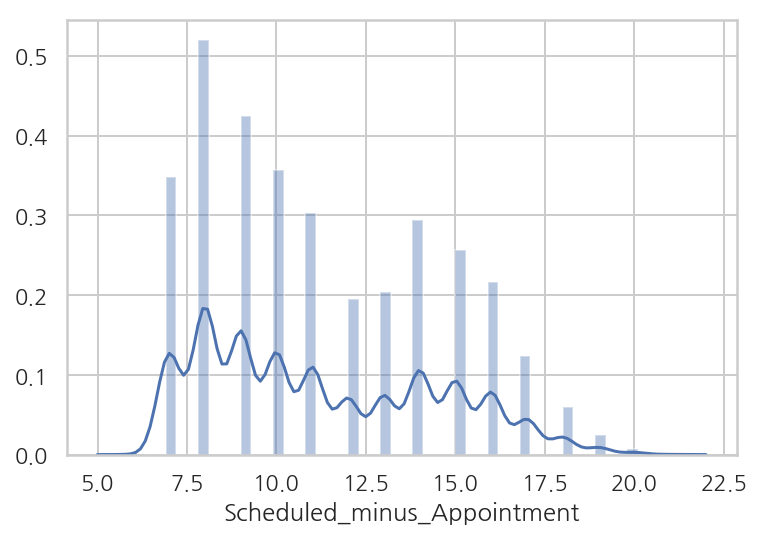

In [64]:
sns.distplot(round(df.Scheduled_minus_Appointment.apply(lambda x : x.seconds/(60*60))))
plt.show()

### Age

In [72]:
sum(df.Age==-1)  ### 이건 뭐지????

1

In [74]:
np.where(df.Age==-1)

(array([99832]),)

In [75]:
df.iloc[99832]

PatientId                               4.65943e+14
AppointmentID                               5775010
Gender                                            F
ScheduledDay                   2016-06-06T08:58:13Z
AppointmentDay                 2016-06-06T00:00:00Z
Age                                              -1
Neighbourhood                                 ROMÃO
Scholarship                                       0
Hipertension                                      0
Diabetes                                          0
Alcoholism                                        0
Handcap                                           0
SMS_received                                      0
No-show                                          No
scheduled_ymd                            2016-06-06
scheduled_Year                                 2016
scheduled_month                                   6
scheduled_day                                     6
scheduled_Hour                                    8
scheduled_Mi

In [73]:
sum(df.Age==0)

3539

In [124]:
df.iloc[np.where(df.Age==0)]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,...,scheduled_Minute,scheduled_dayofweek,appoint_ymd,appoint_Year,appoint_month,appoint_day,appoint_Hour,appoint_Minute,appoint_dayofweek,Scheduled_minus_Appointment
59,7.184428e+13,5638545,F,2016-04-29T08:08:43Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,...,8,4,2016-04-29,2016,4,29,0,0,4,0 days 08:08:43
63,2.366233e+14,5628286,M,2016-04-27T10:46:12Z,2016-04-29T00:00:00Z,0,SÃO BENEDITO,0,0,0,...,46,2,2016-04-29,2016,4,29,0,0,4,-2 days +10:46:12
64,1.885174e+14,5616082,M,2016-04-25T13:28:21Z,2016-04-29T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,...,28,0,2016-04-29,2016,4,29,0,0,4,-4 days +13:28:21
65,2.718818e+14,5628321,M,2016-04-27T10:48:50Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,...,48,2,2016-04-29,2016,4,29,0,0,4,-2 days +10:48:50
67,8.647128e+13,5639264,F,2016-04-29T08:53:02Z,2016-04-29T00:00:00Z,0,NOVA PALESTINA,0,0,0,...,53,4,2016-04-29,2016,4,29,0,0,4,0 days 08:53:02
89,4.314932e+14,5640380,M,2016-04-29T10:37:02Z,2016-04-29T00:00:00Z,0,MONTE BELO,0,0,0,...,37,4,2016-04-29,2016,4,29,0,0,4,0 days 10:37:02
101,6.822847e+13,5642813,M,2016-04-29T17:24:19Z,2016-04-29T00:00:00Z,0,BONFIM,0,0,0,...,24,4,2016-04-29,2016,4,29,0,0,4,0 days 17:24:19
104,3.326985e+12,5632495,F,2016-04-28T08:04:48Z,2016-04-29T00:00:00Z,0,SANTO ANTÔNIO,0,0,0,...,4,3,2016-04-29,2016,4,29,0,0,4,-1 days +08:04:48
132,8.468587e+14,5560742,M,2016-04-08T09:29:23Z,2016-04-29T00:00:00Z,0,PRAIA DO SUÁ,0,0,0,...,29,4,2016-04-29,2016,4,29,0,0,4,-21 days +09:29:23
150,5.392419e+10,5641476,M,2016-04-29T13:43:34Z,2016-04-29T00:00:00Z,0,ITARARÉ,0,0,0,...,43,4,2016-04-29,2016,4,29,0,0,4,0 days 13:43:34


In [ ]:
# 연령대로 나누는 이유는 원래 10대미만 

In [ ]:
df.Age.apply(lambda x : "10대미만" if 0<x<10  else "10대" if 10<=x<20)

In [71]:
df.groupby(["Age","No-show"]).size()

Age   No-show
-1    No            1
 0    No         2900
      Yes         639
 1    No         1858
      Yes         415
 2    No         1366
      Yes         252
 3    No         1236
      Yes         277
 4    No         1017
      Yes         282
 5    No         1169
      Yes         320
 6    No         1205
      Yes         316
 7    No         1126
      Yes         301
 8    No         1106
      Yes         318
 9    No         1008
      Yes         364
 10   No          970
      Yes         304
 11   No          948
      Yes         247
 12   No          820
      Yes         272
 13   No          800
      Yes         303
 14   No          802
                 ... 
 86   Yes          42
 87   No          157
      Yes          27
 88   No          114
      Yes          12
 89   No          144
      Yes          29
 90   No           86
      Yes          23
 91   No           53
      Yes          13
 92   No           66
      Yes          20
 93   No          

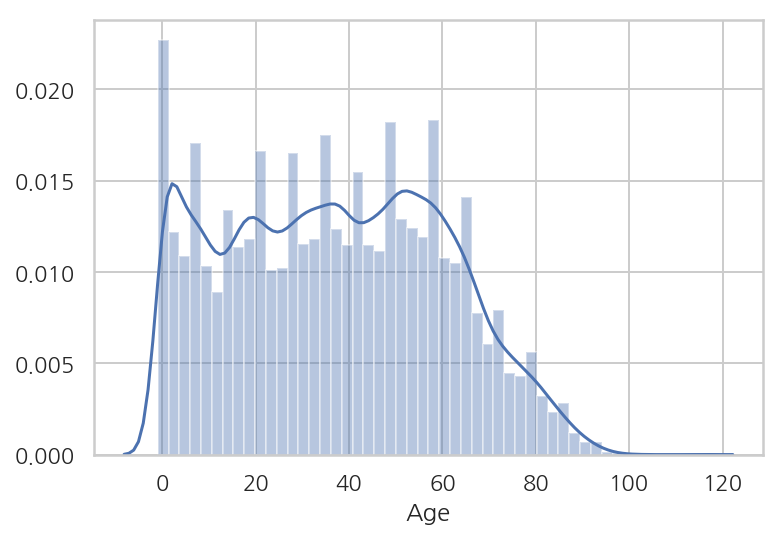

In [66]:
sns.distplot(df.Age)
plt.show()

In [ ]:
len(set(df.Neighbourhood)) # 81개의 지역정보